# Identify projection tables

The code goes through all the sample tables and determines if any goes beyond 2022.

If so, it contains FAO projections.

La tabla 12-sample_Emissions_crops_E_All_Data_(Normalized).csv tiene años más allá de 2024


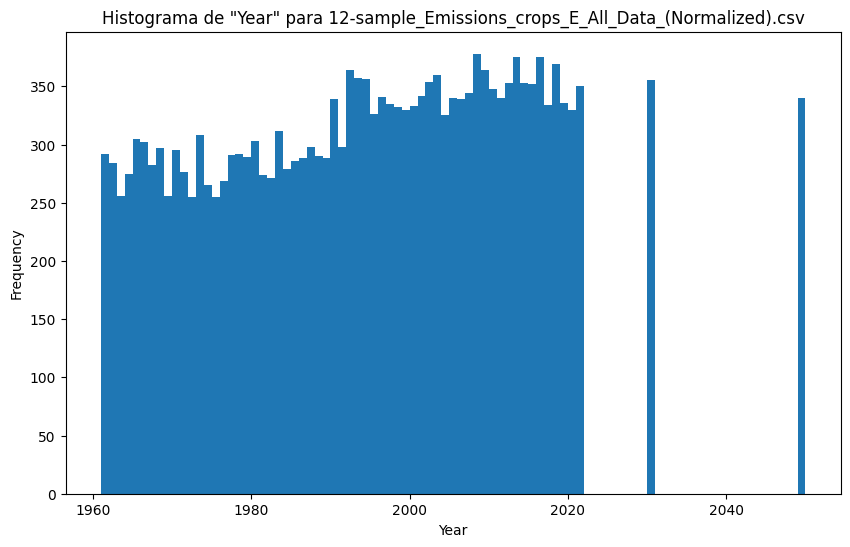

La tabla 12-sample_Emissions_crops_E_All_Data_(Normalized).csv parece ser de PAISES y COMIDA
La tabla 16-sample_Emissions_livestock_E_All_Data_(Normalized).csv tiene años más allá de 2024


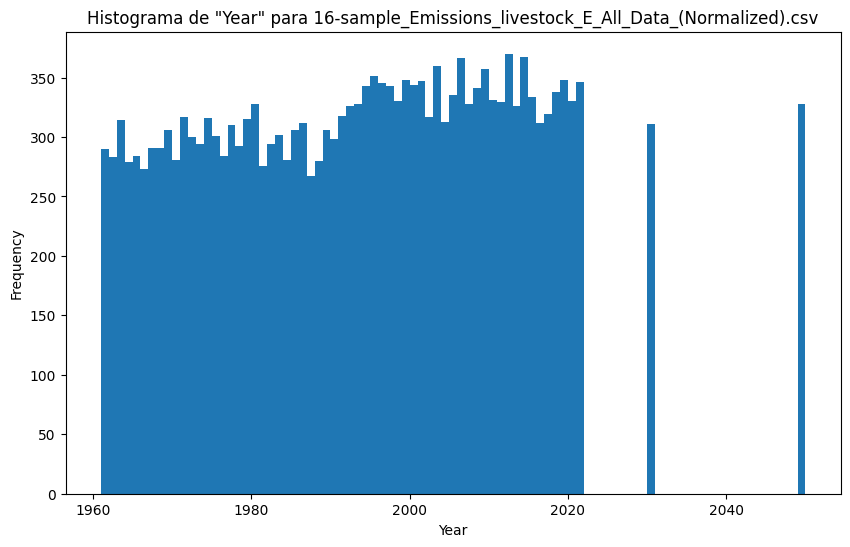

La tabla 16-sample_Emissions_livestock_E_All_Data_(Normalized).csv parece ser de PAISES y COMIDA
La tabla 18-sample_Emissions_Totals_E_All_Data_(Normalized).csv tiene años más allá de 2024


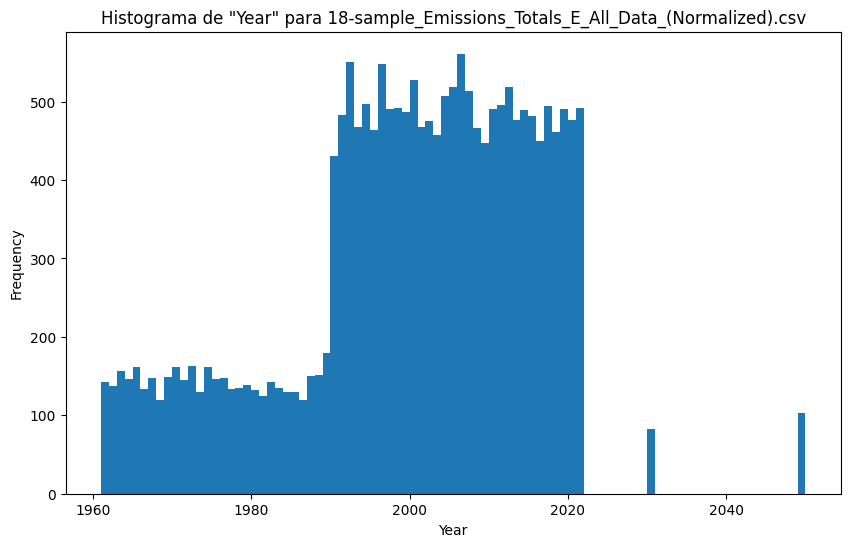

La tabla 18-sample_Emissions_Totals_E_All_Data_(Normalized).csv parece ser SOLO de PAISES
La tabla 36-sample_Food_and_Diet_Individual_Quantitative_Dietary_Data_E_All_Data_(Normalized).csv no tiene la columna 'Year'
Error al procesar la tabla 37-sample_Food_Security_Data_E_All_Data_(Normalized).csv: '>' not supported between instances of 'str' and 'int'
La tabla 40-sample_Household_Consumption_and_Expenditure_Surveys_Food_and_Diet_E_All_Data_(Normalized).csv no tiene la columna 'Year'
La tabla 41-sample_Indicators_from_Household_Surveys_E_All_Data_(Normalized).csv no tiene la columna 'Year'
La tabla 42-sample_Individual_Quantitative_Dietary_Data_Food_and_Diet_E_All_Data_(Normalized).csv no tiene la columna 'Year'
La tabla 57-sample_Minimum_Dietary_Diversity_for_Women_(MDD-W)_Food_and_Diet_E_All_Data_(Normalized).csv no tiene la columna 'Year'
Error al procesar la tabla 71-World_Census_Agriculture_E_All_Data_(Normalized).csv: 'utf-8' codec can't decode byte 0x96 in position 80961: invali

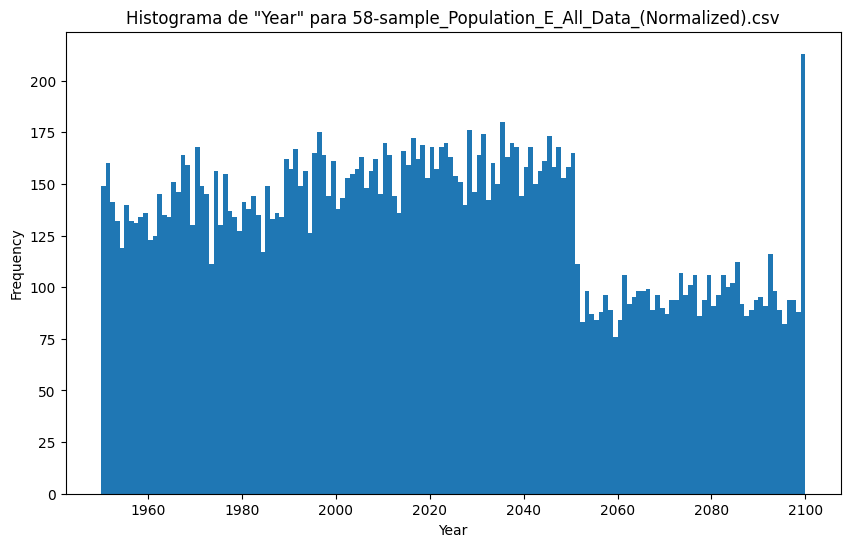

La tabla 58-sample_Population_E_All_Data_(Normalized).csv parece ser SOLO de PAISES


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the DataFrame
all_data = pd.DataFrame()

# Define the directory containing the CSV files
directory = r'..\data\FAOSTAT\sample_data'

# Function to process each CSV file
def process_csv_file(path):
    try:
        df = pd.read_csv(path)
        
        # Check if the "Year" column exists
        if 'Year' not in df.columns:
            print(f"La tabla {os.path.basename(path)} no tiene la columna 'Year'")
            return
        
        # Check if the "Year" column has values beyond 2024
        if df['Year'].max() > 2024:
            print(f"La tabla {os.path.basename(path)} tiene años más allá de 2024")
            
            # Plot histogram of the "Year" column
            plt.figure(figsize=(10, 6))
            df['Year'].hist(bins=range(df['Year'].min(), df['Year'].max() + 1))
            plt.title(f'Histograma de "Year" para {os.path.basename(path)}')
            plt.xlabel('Year')
            plt.ylabel('Frequency')
            plt.grid(False)
            plt.show()
            
            # Check conditions
            condition_paises = all(col in df.columns for col in ['Area Code', 'Year'])
            condition_comida = df['Item'].isin(['Meat of chickens; fresh or chilled', 'Tapioca of cassava', 'Wheat', 'Barley', 'Cattle']).any()

            if condition_paises and not condition_comida:
                print(f"La tabla {os.path.basename(path)} parece ser SOLO de PAISES")
            elif condition_paises and condition_comida:
                print(f"La tabla {os.path.basename(path)} parece ser de PAISES y COMIDA")
            
            # If desired, further processing can be done here
    except Exception as e:
        print(f"Error al procesar la tabla {os.path.basename(path)}: {e}")

# Recursively walk through the directory and process CSV files
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.csv'):
            path = os.path.join(root, filename)
            process_csv_file(path)